                                                                CASE STUDY 04
                                                                    CNN
                                                                --------------
                                                                    
You are given a dataset containing images of 15 types of common vegetables. Your task is to 
create a binary classification model to distinguish between two selected types of vegetables. 
After extracting the data and selecting the two vegetable types, follow these steps:
• Data Preprocessing
• Model Building
• Training
• Evaluation
• Model Optimization
Extension to Multiclass Classification: Once your binary classification model is working well, 
extend it to support multi-class classification. You can progressively add more vegetable types 
to the model.
Real-Time Inference: Test the model with real-time data. Take pictures of vegetables with your 
smartphone or other devices and use the model to classify them. Assess the model's 
performance.

In [ ]:
!pip install tensorflow

In [ ]:
!pip install pillow

In [ ]:
!pip install scipy

In [ ]:
!pip install matplotlib

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_dir = 'Vegetables/Vegetable Images/train'
test_dir = 'Vegetables/Vegetable Images/test'
validation_dir = 'Vegetables/Vegetable Images/validation'


In [10]:
# DATA PREPROCESSING
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
 )

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  
    batch_size=20,
    class_mode='binary',  # For binary classification
    classes=['Carrot', 'Cabbage'],
)

Found 2000 images belonging to 2 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=20,
    class_mode='binary',
    classes=['Carrot', 'Cabbage'],
)

Found 400 images belonging to 2 classes.


In [13]:
# MODEL BUILDING

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# MODEL TRAINING

In [17]:
model.fit(
    train_generator,
    steps_per_epoch=100,  
    epochs=10,
    validation_data=validation_generator,
    validation_steps=20  
)

Epoch 1/10
100/100 [==============================] - 17s 156ms/step - loss: 0.1245 - accuracy: 0.9520 - val_loss: 0.0304 - val_accuracy: 0.9850
Epoch 2/10
100/100 [==============================] - 16s 163ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 16s 163ms/step - loss: 0.0100 - accuracy: 0.9975 - val_loss: 4.4010e-04 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 18s 177ms/step - loss: 0.0241 - accuracy: 0.9945 - val_loss: 0.0046 - val_accuracy: 0.9975
Epoch 5/10
100/100 [==============================] - 18s 182ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 2.9431e-04 - val_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 17s 167ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 1.7901e-05 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 15s 154ms/step - loss: 0.0072 - accuracy: 0.9990 - val_loss: 7.5

In [18]:
# MODEL EVALUATION

In [19]:
scores = model.evaluate(validation_generator)
print("Validation Accuracy: %.2f%%" % (scores[1] * 100))

20/20 [==============================] - 2s 82ms/step - loss: 1.1154e-04 - accuracy: 1.0000
Validation Accuracy: 100.00%


In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=20,
    class_mode='binary',
    shuffle=False,
    classes=['Carrot', 'Cabbage'],
)


Found 400 images belonging to 2 classes.


In [21]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

20/20 [==============================] - 1s 63ms/step - loss: 8.9114e-07 - accuracy: 1.0000
Test Accuracy: 100.00%


In [22]:
predictions = model.predict(test_generator)

20/20 [==============================] - 2s 103ms/step


In [23]:
from keras.preprocessing import image
import numpy as np

In [48]:
# img_path = 'Vegetables/Vegetable Images/test/Cabbage/0979.jpg'  
import cv2,os
# categories=os.listdir('Vegetables/Vegetable Images/test')
# results = []
# wrong_res = []
# for category in ['Carrot', 'Cabbage']:
#     folder_path=os.path.join('Vegetables/Vegetable Images/test',category)
#     img_names=os.listdir(folder_path)
#     for img_name in img_names:
#         img_path=os.path.join(folder_path,img_name)
#         img = image.load_img(img_path, target_size=(64, 64))
#         img_array = image.img_to_array(img)
#         img_array = np.expand_dims(img_array, axis=0)

#         prediction = model.predict(img_array)
#         # print(prediction[0])
#         predicted_class = 'Carrot' if prediction[0] < 0.5 else 'Cabbage'  

#         results.append(f"The predicted class for {category}/{img_name} is: {predicted_class}")
#         if category != predicted_class:
#             wrong_res.append(f"The predicted class for {category}/{img_name} is: {predicted_class}") 


results = []
wrong_res = []
for i, prediction in enumerate(predictions):
    predicted_class = 'Carrot' if prediction < 0.5 else 'Cabbage'

    category = 'Carrot' if i < len(predictions)//2 else 'Cabbage'
    img_name = test_generator.filenames[i]
    results.append(f"The predicted class for {category}/{img_name} is: {predicted_class}")
    if category != predicted_class:
        wrong_res.append(f"The predicted class for {category}/{img_name} is: {predicted_class}")



In [50]:
len(results)

400

In [51]:
print(len(wrong_res))

0


In [52]:
print("\n".join(results))

The predicted class for Carrot/Carrot\1001.jpg is: Carrot
The predicted class for Carrot/Carrot\1002.jpg is: Carrot
The predicted class for Carrot/Carrot\1003.jpg is: Carrot
The predicted class for Carrot/Carrot\1004.jpg is: Carrot
The predicted class for Carrot/Carrot\1005.jpg is: Carrot
The predicted class for Carrot/Carrot\1006.jpg is: Carrot
The predicted class for Carrot/Carrot\1007.jpg is: Carrot
The predicted class for Carrot/Carrot\1008.jpg is: Carrot
The predicted class for Carrot/Carrot\1009.jpg is: Carrot
The predicted class for Carrot/Carrot\1010.jpg is: Carrot
The predicted class for Carrot/Carrot\1011.jpg is: Carrot
The predicted class for Carrot/Carrot\1012.jpg is: Carrot
The predicted class for Carrot/Carrot\1013.jpg is: Carrot
The predicted class for Carrot/Carrot\1014.jpg is: Carrot
The predicted class for Carrot/Carrot\1015.jpg is: Carrot
The predicted class for Carrot/Carrot\1016.jpg is: Carrot
The predicted class for Carrot/Carrot\1017.jpg is: Carrot
The predicted 

In [53]:
#TESTING WITH A REALTIME IMAGE

In [108]:

def show_image(folder_path):
    # Traverse through a folder with images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].set_title("Image")
    ax[1].set_title("Prediction")
    img_path = os.listdir(folder_path)
    for i,veg_img in enumerate(img_path):
        print(i, veg_img, len(img_path))
        # Load the image
        img_name = os.path.join(folder_path,veg_img)
        img = image.load_img(img_name, target_size=(64, 64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class of the image
        prediction = model.predict(img_array)
        predicted_class = 'Carrot' if prediction[0] < 0.5 else 'Cabbage'

        # Display the image on the right side of a variable value inside a for loop
        img = cv2.imread(img_name)
        ax[0].imshow(img)
        ax[1].text(0.5, 0.5, predicted_class, fontsize=20, ha="center")
        if i != len(img_path)-1:
            fig, ax = plt.subplots(1, 2, figsize=(10, 5))
            ax[0].set_title("Image")
            ax[1].set_title("Prediction")
        elif i == len(img_path)-1:
            plt.show()

0 WhatsApp Image 2023-11-09 at 9.47.45 AM.jpeg 2
1/1 [==============================] - 0s 23ms/step
1 WhatsApp Image 2023-11-09 at 9.50.27 AM.jpeg 2
1/1 [==============================] - 0s 21ms/step


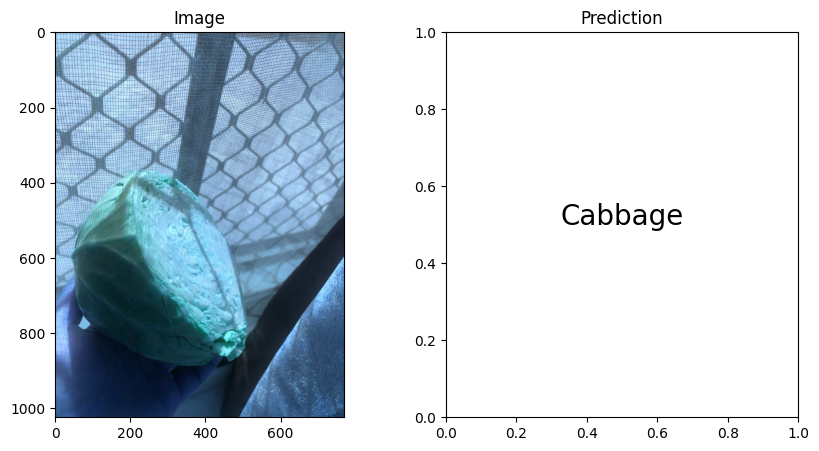

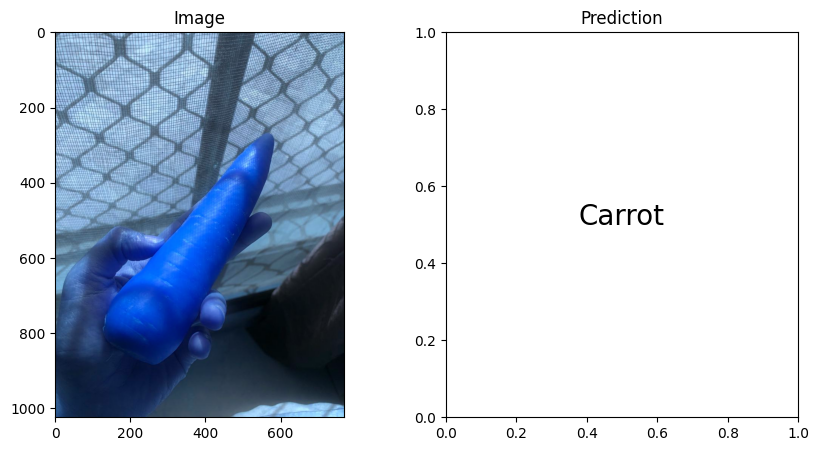

In [110]:
real_img_dir = 'Real Images'
show_image(real_img_dir)